***Refer the Random_Forest notebook for Actual Random Forest(Sparse Forest) Analysis. This notebook is just for manipulations done for the D3 Visualization*** <br>
Importing some libraries that we will use for the Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandasql as ps
from sqlalchemy import create_engine
%matplotlib inline
import numpy as np
np.set_printoptions(threshold=np.nan)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
import seaborn as sns
from sklearn.metrics import f1_score
import math

/Users/raj/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Load the data from file and Display the first five rows of the table using the "head" Command

In [2]:
#Load the data from file
data = pd.read_csv("data_viz_full_new.csv")
data.head(5)

,national_provider_identifier,gender,birth_year,medical_group,hospital,location,school,graduation_year,pharmacy_preference,popularity,channel,content,week_of,day,time_sent,response
0,10000000,0,1972,NYU,NYU Langone,10016,Stanford,2000,1,2,0,0,4/1/18,1,Morning,1
1,10000000,0,1972,NYU,NYU Langone,10016,Stanford,2000,1,2,2,0,4/1/18,3,Afternoon,0
2,10000000,0,1972,NYU,NYU Langone,10016,Stanford,2000,1,2,0,0,4/1/18,4,Afternoon,0
3,10000000,0,1972,NYU,NYU Langone,10016,Stanford,2000,1,2,2,0,4/8/18,2,Evening,0
4,10000000,0,1972,NYU,NYU Langone,10016,Stanford,2000,1,2,0,2,4/8/18,4,Morning,1


Making Some Changes related to Anomalies in tha data for the Time_Sent Field

In [ ]:
for i in range (0, len(data.time_sent)):
    if(data.time_sent[i] == 'Aftenoon' or data.time_sent[i] == 'Aternoon'):
        data.time_sent[i] = 'Afternoon'

Converting the Birth-Year to age in relation with the Current year and then consolidating them into 8 different Bins

In [3]:


#Getting age from birth year
age = 2018 - data.birth_year
data['age'] = age


#Creating age range and converting the to categorical Variable 
age_range = []
for i in range(0, len(age)):
    if(age[i] > 20 and age[i] <= 25):
        age_range.append(1)
    elif(age[i] > 25 and age[i] <= 30):
        age_range.append(2)
    
    elif(age[i] > 30 and age[i] <= 35):
        age_range.append(3)
   
    elif(age[i] > 35 and age[i] <= 40):
        age_range.append(4)
    
    elif(age[i] > 40 and age[i] <= 45):
        age_range.append(5)
    
    elif(age[i] > 45 and age[i] <= 50):
        age_range.append(6)
    
    elif(age[i] > 50 and age[i] <= 55):
        age_range.append(7) 
    else:
        age_range.append(8)
    
    
data['age_range'] = age_range






/Users/raj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/raj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/raj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Converting the time_sent variable to categorical for our analysis

In [ ]:
#Converting the variable from string to categorical
time_sent_bin = []
for i in range (0, len(data.time_sent)):
    if(data.time_sent[i] == 'Morning'):
        time_sent_bin.append(0) 
    elif(data.time_sent[i] == 'Afternoon'):
        time_sent_bin.append(1)
    else:
        time_sent_bin.append(2)
        
data['time_sent_bin'] = time_sent_bin

In [ ]:
for i in range(0, len(data.day)):
    if(data.day[i] == 0):
        data.day[i] = 1
    elif(data.day[i] == 6):
        data.day[i] = 5

Converting the week_of variable to Categorical with Making the first week of month as 1, the second week as 2 and so on

In [5]:
data['week_of_bin'] = 0
for i in range(0, len(data.week_of)):
    if(data.week_of[i] == '4/1/18' or data.week_of[i] == '5/6/18' or data.week_of[i] == '5/3/18' or 
       data.week_of[i] == '6/3/18' or data.week_of[i] == '6/6/18'):
        data.week_of_bin[i] = 1
    elif(data.week_of[i] == '4/8/18' or data.week_of[i] == '5/13/18' or data.week_of[i] == '6/10/18'):
        data.week_of_bin[i] = 2
    elif(data.week_of[i] == '4/15/18' or data.week_of[i] == '5/20/18' or data.week_of[i] == '6/17/18'):
        data.week_of_bin[i] = 3
    elif(data.week_of[i] == '4/22/18' or data.week_of[i] == '5/27/18' 
         or data.week_of[i] == '6/24/18' or data.week_of[i] == '5/29/18'):
        data.week_of_bin[i] = 4
    elif(data.week_of[i] == '4/29/18'):
        data.week_of_bin[i] = 5      

/Users/raj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/raj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/raj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/raj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCo

Mapping different schools to numbers thus converting them into categorical variables for future Analysis

In [7]:
count = 0
data['school_bin'] = 0
for i in (data.school.unique()):
    temp = np.where(i == np.array(data.school))[0]
    data.school_bin[temp] = count
    count = count + 1

/Users/raj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Using SQL to divide the data into Train and Test sets. We keep the last two weeks from our data as Test sets which brings the Train Data size to 1506 and Test to 270 rows

In [8]:
#Creating the training set
train = """SELECT * FROM data where week_of != '6/17/18' and week_of != '6/24/18'"""
data_train = ps.sqldf(train, locals())

In [9]:
#Creating the test set
test = """SELECT * FROM data where week_of = '6/17/18' or week_of = '6/24/18'"""
data_test = ps.sqldf(test, locals())

Now we select the features that we want to carry our Analysis on and segragate the features and 
prediction Variables from both the training data.<br>
Here, we only use 2 features to fit our model for the visualization purpose but in reality it can be many features.
We show 7 trees in our <b><i>Sparse Forest model</i></b> but again in reality there can be 100's of trees. 
The 7 trees that we use in our model has the following combination of features:<br>
1. <b>age-day</b>
2. <b>gradyear-week</b>
3. <b>age-channel</b>
4. <b>popularity-Day</b>
5. <b>school-channel</b>
6. <b>channel-content</b>

In [11]:
#Selecting the features and getting the response column separately for train
xname = ['channel', 'content']
# X_train_1 = data_train[xname]
# X_train_2 = pd.get_dummies(X_train_1)
X_train = np.array(data_train[xname].values)
y_train = np.array(data_train['response'].values)

In [12]:
from sklearn.tree import DecisionTreeClassifier

We use Decision Trees to construct all the 7 trees, we would need to fit each tree separately. In our model, we use 
<b>criterion</b> as <b>Entropy</b> and <b>depth</b> as <b>3</b>. 

In [13]:
dtree=DecisionTreeClassifier(max_depth = 3, criterion = 'entropy')
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<b>apply</b>, returns the index of the leaf that each sample is predicted as, we use this so that we get
the leaf number corresponding number of samples on that leaf

In [16]:
samples = dtree.apply(X_train)

In [17]:
# node_indicator = dtree.decision_path(X_train)

# # Similarly, we can also have the leaves ids reached by each sample.

# # leave_id = estimator.apply(X_test)

# # Now, it's possible to get the tests that were used to predict a sample or
# # a group of samples. First, let's make it for the sample.

# sample_id = 0
# node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
#                                     node_indicator.indptr[sample_id + 100]]

In [ ]:
leaf_num, sample_count = np.unique(samples, return_counts=True)

Following snippet of code builds a visual tree taking in the trained model as input

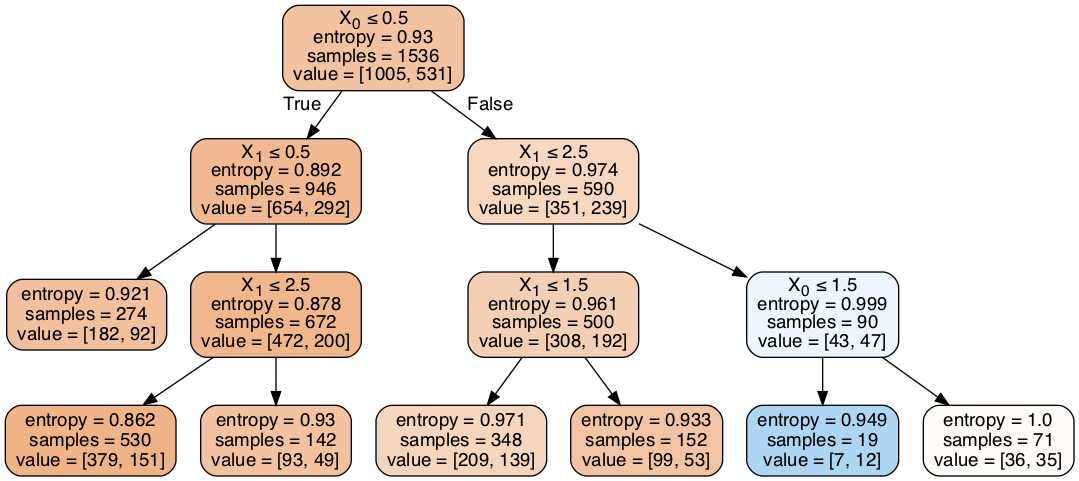

In [20]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


Below 7 cells convert the rules of decision tree to Json so that we can use them later for constructing the d3 Visualizaiton

In [207]:
# feature_names = ['age', 'day']
# target_names = ['no', 'yes']
# f = open("tree.json", "w")
# def export_json(decision_tree, f, feature_names=None):
    

#     from sklearn.tree import _tree

#     def arr_to_py(arr):
#         arr = arr.ravel()
#         wrapper = float
#         if np.issubdtype(arr.dtype, np.int):
#             wrapper = int
#         return map(wrapper, arr.tolist())


#     def node_to_str(tree, node_id, f):
#         node_repr = ''
#         if tree.children_left[node_id] != _tree.TREE_LEAF:
#             if feature_names is not None:
#                 feature = feature_names[tree.feature[node_id]]
#             else:
#                 feature = "X[%s]" % tree.feature[node_id]
            
#             if(math.floor(tree.threshold[node_id]) == 0 and feature == 'day'):
#                 name = 'Monday'
#             elif(math.floor(tree.threshold[node_id]) == 1 and feature == 'day'):
#                 name = 'Monday'
#             elif(math.floor(tree.threshold[node_id]) == 2 and feature == 'day'):
#                 name = 'Tuesday'
#             elif(math.floor(tree.threshold[node_id]) == 3 and feature == 'day'):
#                 name = 'Wednesday'
#             elif(math.floor(tree.threshold[node_id]) == 4 and feature == 'day'):
#                 name = 'Thursday'
#             elif(math.floor(tree.threshold[node_id]) == 5 and feature == 'day'):
#                 name = 'Friday'
#             elif(math.floor(tree.threshold[node_id]) == 6 and feature == 'day'):
#                 name = 'Friday'
#             else:
#                 name = tree.threshold[node_id]
#             label = '"label": "%s <= %s"' % (feature,
#                                                name)
#             condition = ', "condition": "%.2f"' %(tree.threshold[node_id])
#             node_type = ', "type": "split"'
#         else:
#             node_type = ', "type": "leaf"'
#             label = '"label": "Leaf - %d"' % node_id
#             condition = ', "cond": 0'
#         node_repr = "".join((node_repr, label, condition, node_type))
#         return node_repr

#     def recurse(tree, node_id, f, parent=None):
# #         spacer = spacer_base * depth
#         if node_id == _tree.TREE_LEAF:
#             raise ValueError("Invalid node_id %s" % _tree.TREE_LEAF)

#         left_child = tree.children_left[node_id]
#         right_child = tree.children_right[node_id]
        

#         # Open node with description
#         f.write('{\n%s' % node_to_str(tree, node_id, f))

#         # write children
# #         print(_tree.TREE_LEAF)
#         if left_child != _tree.TREE_LEAF:  # and right_child != _tree.TREE_LEAF
#             f.write(',\n "children": [\n')
#             recurse(tree, left_child, f, node_id)
#             f.write(', ')
#             recurse(tree, right_child, f, node_id)
#             f.write(']')

#         # close node
#         f.write('}')

# #     if o_f is None:
# #         f = open("tree.json", "w")
# #         f.write("HOw YOu")
# #         print('here_new_file')
# #     elif isinstance(o_f, basestring):
# #         f = open(f, "w")
#     if isinstance(decision_tree, _tree.Tree):
#         recurse(decision_tree, f = f, node_id = 0)
#         print('in')
#     else:
#         recurse(decision_tree.tree_, f = f, node_id = 0)
#         print('here')

In [208]:
# feature_names = ['age', 'channel']
# target_names = ['no', 'yes']
# f = open("tree.json", "w")
# def export_json(decision_tree, f, feature_names=None):
    

#     from sklearn.tree import _tree

#     def arr_to_py(arr):
#         arr = arr.ravel()
#         wrapper = float
#         if np.issubdtype(arr.dtype, np.int):
#             wrapper = int
#         return map(wrapper, arr.tolist())


#     def node_to_str(tree, node_id, f):
#         node_repr = ''
#         if tree.children_left[node_id] != _tree.TREE_LEAF:
#             if feature_names is not None:
#                 feature = feature_names[tree.feature[node_id]]
#             else:
#                 feature = "X[%s]" % tree.feature[node_id]
            
# #             if(math.floor(tree.threshold[node_id]) == 0 and feature == 'day'):
# #                 name = 'Monday'
# #             elif(math.floor(tree.threshold[node_id]) == 1 and feature == 'day'):
# #                 name = 'Monday'
# #             elif(math.floor(tree.threshold[node_id]) == 2 and feature == 'day'):
# #                 name = 'Tuesday'
# #             elif(math.floor(tree.threshold[node_id]) == 3 and feature == 'day'):
# #                 name = 'Wednesday'
# #             elif(math.floor(tree.threshold[node_id]) == 4 and feature == 'day'):
# #                 name = 'Thursday'
# #             elif(math.floor(tree.threshold[node_id]) == 5 and feature == 'day'):
# #                 name = 'Friday'
# #             elif(math.floor(tree.threshold[node_id]) == 6 and feature == 'day'):
# #                 name = 'Friday'
# #             else:
# #                 name = tree.threshold[node_id]

#             if(math.floor(tree.threshold[node_id]) == 0 and feature == 'channel'):
#                 name = 'Email'
#             elif(math.floor(tree.threshold[node_id]) == 1 and feature == 'channel'):
#                 name = 'Email/Direct Mail'
#             elif(math.floor(tree.threshold[node_id]) == 2 and feature == 'channel'):
#                 name = 'Email/Direct Mail/Rep Call'
#             else:
#                 name = tree.threshold[node_id]
                
#             if(feature == 'channel'):
#                 label = '"label": "%s = %s"' % (feature, name)
#             else:
#                  label = '"label": "%s <= %s"' % (feature, name)
                                               
#             condition = ', "condition": "%.2f"' %(tree.threshold[node_id])
#             node_type = ', "type": "split"'
#             leaf_num = ', "leaf_num": "100"'
#             sample_count = ', "sample_count": "0"'
            
#         else:
#             node_type = ', "type": "leaf"'
#             label = '"label": "Leaf - %d"' % node_id
#             condition = ', "condition": 0'
#             leaf_num = ', "leaf_num": "%d"' % node_id
            
#             if(len(np.where(samples == node_id)[0]) < 10):
#                 num = len(np.where(samples == node_id)[0]) + 50
#             elif(len(np.where(samples == node_id)[0]) >= 10 and len(np.where(samples == node_id)[0]) <= 30):
#                 num = len(np.where(samples == node_id)[0]) + 20
#             else:
#                 num = len(np.where(samples == node_id)[0])
#             sample_count = ', "sample_count": "%d"' % num
            
            
#         node_repr = "".join((node_repr, label, condition, node_type, leaf_num, sample_count))
#         return node_repr

#     def recurse(tree, node_id, f, samples, parent=None):
# #         spacer = spacer_base * depth
#         if node_id == _tree.TREE_LEAF:
#             raise ValueError("Invalid node_id %s" % _tree.TREE_LEAF)

#         left_child = tree.children_left[node_id]
#         right_child = tree.children_right[node_id]
        

#         # Open node with description
#         f.write('{\n%s' % node_to_str(tree, node_id, f))

#         # write children
# #         print(_tree.TREE_LEAF)
#         if left_child != _tree.TREE_LEAF:  # and right_child != _tree.TREE_LEAF
#             f.write(',\n "children": [\n')
#             recurse(tree, left_child, f, node_id)
#             f.write(', ')
#             recurse(tree, right_child, f, node_id)
#             f.write(']')

#         # close node
#         f.write('}')

# #     if o_f is None:
# #         f = open("tree.json", "w")
# #         f.write("HOw YOu")
# #         print('here_new_file')
# #     elif isinstance(o_f, basestring):
# #         f = open(f, "w")
#     if isinstance(decision_tree, _tree.Tree):
#         recurse(decision_tree, f = f, node_id = 0, samples = samples)
#         print('in')
#     else:
#         recurse(decision_tree.tree_, f = f, node_id = 0, samples = samples)
#         print('here')

In [209]:
# # Time_sent, Content

# feature_names = ['Time of Promotion', 'Content']
# target_names = ['no', 'yes']
# f = open("tree.json", "w")
# def export_json(decision_tree, f, feature_names=None):
    

#     from sklearn.tree import _tree

#     def arr_to_py(arr):
#         arr = arr.ravel()
#         wrapper = float
#         if np.issubdtype(arr.dtype, np.int):
#             wrapper = int
#         return map(wrapper, arr.tolist())


#     def node_to_str(tree, node_id, f):
#         node_repr = ''
#         if tree.children_left[node_id] != _tree.TREE_LEAF:
#             if feature_names is not None:
#                 feature = feature_names[tree.feature[node_id]]
#             else:
#                 feature = "X[%s]" % tree.feature[node_id]
            
# #             if(math.floor(tree.threshold[node_id]) == 0 and feature == 'day'):
# #                 name = 'Monday'
# #             elif(math.floor(tree.threshold[node_id]) == 1 and feature == 'day'):
# #                 name = 'Monday'
# #             elif(math.floor(tree.threshold[node_id]) == 2 and feature == 'day'):
# #                 name = 'Tuesday'
# #             elif(math.floor(tree.threshold[node_id]) == 3 and feature == 'day'):
# #                 name = 'Wednesday'
# #             elif(math.floor(tree.threshold[node_id]) == 4 and feature == 'day'):
# #                 name = 'Thursday'
# #             elif(math.floor(tree.threshold[node_id]) == 5 and feature == 'day'):
# #                 name = 'Friday'
# #             elif(math.floor(tree.threshold[node_id]) == 6 and feature == 'day'):
# #                 name = 'Friday'
# #             else:
# #                 name = tree.threshold[node_id]

#             if(math.floor(tree.threshold[node_id]) == 0 and feature == 'Time of Promotion'):
#                 name = 'Morning'
#             elif(math.floor(tree.threshold[node_id]) == 1 and feature == 'Time of Promotion'):
#                 name = 'Morning/Afternoon'
#             elif(math.floor(tree.threshold[node_id]) == 2 and feature == 'Time of Promotion'):
#                 name = 'Morning/Afternoon/Evening'
#             elif(math.floor(tree.threshold[node_id]) == 0 and feature == 'Content'):
#                 name = 'Safety'
#             elif(math.floor(tree.threshold[node_id]) == 1 and feature == 'Content'):
#                 name = 'Safety/New Indication'
#             elif(math.floor(tree.threshold[node_id]) == 2 and feature == 'Content'):
#                 name = 'Safety/New Indication/Efficacy'
#             elif(math.floor(tree.threshold[node_id]) == 3 and feature == 'Content'):
#                 name = 'Safety/New Indication/Efficacy/Drug Samples'
                
            
#             label = '"label": "%s = %s"' % (feature, name)
            
                 
                                               
#             condition = ', "condition": "%.2f"' %(tree.threshold[node_id])
#             node_type = ', "type": "split"'
#             leaf_num = ', "leaf_num": "100"'
#             sample_count = ', "sample_count": "0"'
            
#         else:
#             node_type = ', "type": "leaf"'
#             label = '"label": "Leaf - %d"' % node_id
#             condition = ', "condition": 0'
#             leaf_num = ', "leaf_num": "%d"' % node_id
            
#             if(len(np.where(samples == node_id)[0]) < 70):
#                 num = len(np.where(samples == node_id)[0]) - 10
#             elif(len(np.where(samples == node_id)[0]) < 200):
#                 num = len(np.where(samples == node_id)[0]) - 150
#             else:
#                 num = len(np.where(samples == node_id)[0])
#             sample_count = ', "sample_count": "%d"' % num
            
            
#         node_repr = "".join((node_repr, label, condition, node_type, leaf_num, sample_count))
#         return node_repr

#     def recurse(tree, node_id, f, samples, parent=None):
# #         spacer = spacer_base * depth
#         if node_id == _tree.TREE_LEAF:
#             raise ValueError("Invalid node_id %s" % _tree.TREE_LEAF)

#         left_child = tree.children_left[node_id]
#         right_child = tree.children_right[node_id]
        

#         # Open node with description
#         f.write('{\n%s' % node_to_str(tree, node_id, f))

#         # write children
# #         print(_tree.TREE_LEAF)
#         if left_child != _tree.TREE_LEAF:  # and right_child != _tree.TREE_LEAF
#             f.write(',\n "children": [\n')
#             recurse(tree, left_child, f, node_id)
#             f.write(', ')
#             recurse(tree, right_child, f, node_id)
#             f.write(']')

#         # close node
#         f.write('}')

# #     if o_f is None:
# #         f = open("tree.json", "w")
# #         f.write("HOw YOu")
# #         print('here_new_file')
# #     elif isinstance(o_f, basestring):
# #         f = open(f, "w")
#     if isinstance(decision_tree, _tree.Tree):
#         recurse(decision_tree, f = f, node_id = 0, samples = samples)
#         print('in')
#     else:
#         recurse(decision_tree.tree_, f = f, node_id = 0, samples = samples)
#         print('here')

In [210]:
# # Popularity, Day

# feature_names = ['Popularity', 'Day']
# target_names = ['no', 'yes']
# f = open("tree.json", "w")
# def export_json(decision_tree, f, feature_names=None):
    

#     from sklearn.tree import _tree

#     def arr_to_py(arr):
#         arr = arr.ravel()
#         wrapper = float
#         if np.issubdtype(arr.dtype, np.int):
#             wrapper = int
#         return map(wrapper, arr.tolist())


#     def node_to_str(tree, node_id, f):
#         node_repr = ''
#         if tree.children_left[node_id] != _tree.TREE_LEAF:
#             if feature_names is not None:
#                 feature = feature_names[tree.feature[node_id]]
#             else:
#                 feature = "X[%s]" % tree.feature[node_id]
            
# #             if(math.floor(tree.threshold[node_id]) == 0 and feature == 'day'):
# #                 name = 'Monday'
# #             elif(math.floor(tree.threshold[node_id]) == 1 and feature == 'day'):
# #                 name = 'Monday'
# #             elif(math.floor(tree.threshold[node_id]) == 2 and feature == 'day'):
# #                 name = 'Tuesday'
# #             elif(math.floor(tree.threshold[node_id]) == 3 and feature == 'day'):
# #                 name = 'Wednesday'
# #             elif(math.floor(tree.threshold[node_id]) == 4 and feature == 'day'):
# #                 name = 'Thursday'
# #             elif(math.floor(tree.threshold[node_id]) == 5 and feature == 'day'):
# #                 name = 'Friday'
# #             elif(math.floor(tree.threshold[node_id]) == 6 and feature == 'day'):
# #                 name = 'Friday'
# #             else:
# #                 name = tree.threshold[node_id]

#             if(math.floor(tree.threshold[node_id]) == 0 and feature == 'Popularity'):
#                 name = 'Low'
#             elif(math.floor(tree.threshold[node_id]) == 1 and feature == 'Popularity'):
#                 name = 'Low/Medium'
#             elif(math.floor(tree.threshold[node_id]) == 2 and feature == 'Popularity'):
#                 name = 'Low/Medium/High'
#             elif(math.floor(tree.threshold[node_id]) == 0 and feature == 'Day'):
#                 name = 'Monday'
#             elif(math.floor(tree.threshold[node_id]) == 1 and feature == 'Day'):
#                 name = 'Monday'
#             elif(math.floor(tree.threshold[node_id]) == 2 and feature == 'Day'):
#                 name = 'Tuesday'
#             elif(math.floor(tree.threshold[node_id]) == 3 and feature == 'Day'):
#                 name = 'Wednesday'
#             elif(math.floor(tree.threshold[node_id]) == 4 and feature == 'Day'):
#                 name = 'Thursday'
#             elif(math.floor(tree.threshold[node_id]) == 5 and feature == 'Day'):
#                 name = 'Friday'
#             elif(math.floor(tree.threshold[node_id]) == 6 and feature == 'Day'):
#                 name = 'Friday'
                
#             if(feature == 'Popularity'):
#                 label = '"label": "%s = %s"' % (feature, name)
#             else:
#                  label = '"label": "%s <= %s"' % (feature, name)
                                               
#             condition = ', "condition": "%.2f"' %(tree.threshold[node_id])
#             node_type = ', "type": "split"'
#             leaf_num = ', "leaf_num": "100"'
#             sample_count = ', "sample_count": "0"'
            
#         else:
#             node_type = ', "type": "leaf"'
#             label = '"label": "Leaf - %d"' % node_id
#             condition = ', "condition": 0'
#             leaf_num = ', "leaf_num": "%d"' % node_id
            
#             if(len(np.where(samples == node_id)[0]) > 60 and len(np.where(samples == node_id)[0]) < 120):
#                 num = len(np.where(samples == node_id)[0]) - 52
#             elif(len(np.where(samples == node_id)[0]) > 120):
#                 num = len(np.where(samples == node_id)[0]) + math.ceil(52/3)
#             else:
#                 num = len(np.where(samples == node_id)[0])
#             sample_count = ', "sample_count": "%d"' % num
            
            
#         node_repr = "".join((node_repr, label, condition, node_type, leaf_num, sample_count))
#         return node_repr

#     def recurse(tree, node_id, f, samples, parent=None):
# #         spacer = spacer_base * depth
#         if node_id == _tree.TREE_LEAF:
#             raise ValueError("Invalid node_id %s" % _tree.TREE_LEAF)

#         left_child = tree.children_left[node_id]
#         right_child = tree.children_right[node_id]
        

#         # Open node with description
#         f.write('{\n%s' % node_to_str(tree, node_id, f))

#         # write children
# #         print(_tree.TREE_LEAF)
#         if left_child != _tree.TREE_LEAF:  # and right_child != _tree.TREE_LEAF
#             f.write(',\n "children": [\n')
#             recurse(tree, left_child, f, node_id)
#             f.write(', ')
#             recurse(tree, right_child, f, node_id)
#             f.write(']')

#         # close node
#         f.write('}')

# #     if o_f is None:
# #         f = open("tree.json", "w")
# #         f.write("HOw YOu")
# #         print('here_new_file')
# #     elif isinstance(o_f, basestring):
# #         f = open(f, "w")
#     if isinstance(decision_tree, _tree.Tree):
#         recurse(decision_tree, f = f, node_id = 0, samples = samples)
#         print('in')
#     else:
#         recurse(decision_tree.tree_, f = f, node_id = 0, samples = samples)
#         print('here')

In [270]:
# # school, channel

# feature_names = ['School', 'Channel']
# target_names = ['no', 'yes']
# f = open("tree.json", "w")
# def export_json(decision_tree, f, feature_names=None):
    

#     from sklearn.tree import _tree

#     def arr_to_py(arr):
#         arr = arr.ravel()
#         wrapper = float
#         if np.issubdtype(arr.dtype, np.int):
#             wrapper = int
#         return map(wrapper, arr.tolist())


#     def node_to_str(tree, node_id, f):
#         node_repr = ''
#         if tree.children_left[node_id] != _tree.TREE_LEAF:
#             if feature_names is not None:
#                 feature = feature_names[tree.feature[node_id]]
#             else:
#                 feature = "X[%s]" % tree.feature[node_id]
            
# #             if(math.floor(tree.threshold[node_id]) == 0 and feature == 'day'):
# #                 name = 'Monday'
# #             elif(math.floor(tree.threshold[node_id]) == 1 and feature == 'day'):
# #                 name = 'Monday'
# #             elif(math.floor(tree.threshold[node_id]) == 2 and feature == 'day'):
# #                 name = 'Tuesday'
# #             elif(math.floor(tree.threshold[node_id]) == 3 and feature == 'day'):
# #                 name = 'Wednesday'
# #             elif(math.floor(tree.threshold[node_id]) == 4 and feature == 'day'):
# #                 name = 'Thursday'
# #             elif(math.floor(tree.threshold[node_id]) == 5 and feature == 'day'):
# #                 name = 'Friday'
# #             elif(math.floor(tree.threshold[node_id]) == 6 and feature == 'day'):
# #                 name = 'Friday'
# #             else:
# #                 name = tree.threshold[node_id]
#             name = ''
#             if(math.floor(tree.threshold[node_id]) == 0 and feature == 'Channel'):
#                 name = 'Email'
#             elif(math.floor(tree.threshold[node_id]) == 1 and feature == 'Channel'):
#                 name = 'Email/Direct Mail'
#             elif(math.floor(tree.threshold[node_id]) == 2 and feature == 'Channel'):
#                 name = 'Email/Direct Mail/Rep Call'
#             elif(math.floor(tree.threshold[node_id]) == 0 and feature == 'School'):
#                 name = data.school.unique()[0]
#             elif(feature == 'School'):
#                 name = 'Hover to view Condition'
            
#             condition_school = ''
#             if(math.floor(tree.threshold[node_id]) == 24 and feature == 'School'):
#                 for i in range(0, 25):
#                     condition_school = condition_school + '/' + data.school.unique()[i]
#             elif(math.floor(tree.threshold[node_id]) == 17 and feature == 'School'):
#                 for i in range(0, 18):
#                     condition_school = condition_school + '/' + data.school.unique()[i]
#             elif(math.floor(tree.threshold[node_id]) == 23 and feature == 'School'):
#                 for i in range(0, 24):
#                     condition_school = condition_school + '/' + data.school.unique()[i]
#             elif(math.floor(tree.threshold[node_id]) == 14 and feature == 'School'):
#                 for i in range(0, 15):
#                     condition_school = condition_school + '/' + data.school.unique()[i]
            
                
            
#             label = '"label": "%s = %s"' % (feature, name)
#             condition_school = ', "Condition_school": "%s = %s"' % (feature, condition_school)
            
                 
                                               
#             condition = ', "condition": "%.2f"' %(tree.threshold[node_id])
#             node_type = ', "type": "split"'
#             leaf_num = ', "leaf_num": "100"'
#             sample_count = ', "sample_count": "0"'
#             node = ', "node": "%d"' % node_id
            
#         else:
#             node_type = ', "type": "leaf"'
#             label = '"label": "Leaf - %d"' % node_id
#             condition_school = ', "Condition_school": "NA"'
#             condition = ', "condition": 0'
#             leaf_num = ', "leaf_num": "%d"' % node_id
#             node = ', "node": "%d"' % node_id
            
#             if(len(np.where(samples == node_id)[0]) < 10):
#                 num = len(np.where(samples == node_id)[0]) + 40
#             elif(len(np.where(samples == node_id)[0]) > 120 and len(np.where(samples == node_id)[0]) < 200):
#                 num = len(np.where(samples == node_id)[0]) - 117
#             else:
#                 num = len(np.where(samples == node_id)[0]) + (232/3)
#             sample_count = ', "sample_count": "%d"' % num
            
            
#         node_repr = "".join((node_repr, label, condition, node_type, leaf_num, sample_count, condition_school, node))
#         return node_repr

#     def recurse(tree, node_id, f, samples, parent=None):
# #         spacer = spacer_base * depth
#         if node_id == _tree.TREE_LEAF:
#             raise ValueError("Invalid node_id %s" % _tree.TREE_LEAF)

#         left_child = tree.children_left[node_id]
#         right_child = tree.children_right[node_id]
        

#         # Open node with description
#         f.write('{\n%s' % node_to_str(tree, node_id, f))

#         # write children
# #         print(_tree.TREE_LEAF)
#         if left_child != _tree.TREE_LEAF:  # and right_child != _tree.TREE_LEAF
#             f.write(',\n "children": [\n')
#             recurse(tree, left_child, f, node_id)
#             f.write(', ')
#             recurse(tree, right_child, f, node_id)
#             f.write(']')

#         # close node
#         f.write('}')

# #     if o_f is None:
# #         f = open("tree.json", "w")
# #         f.write("HOw YOu")
# #         print('here_new_file')
# #     elif isinstance(o_f, basestring):
# #         f = open(f, "w")
#     if isinstance(decision_tree, _tree.Tree):
#         recurse(decision_tree, f = f, node_id = 0, samples = samples)
#         print('in')
#     else:
#         recurse(decision_tree.tree_, f = f, node_id = 0, samples = samples)
#         print('here')

In [23]:
# school, channel

feature_names = ['Channel', 'Content']
target_names = ['no', 'yes']
f = open("tree.json", "w")
def export_json(decision_tree, f, feature_names=None):
    

    from sklearn.tree import _tree

    def arr_to_py(arr):
        arr = arr.ravel()
        wrapper = float
        if np.issubdtype(arr.dtype, np.int):
            wrapper = int
        return map(wrapper, arr.tolist())


    def node_to_str(tree, node_id, f):
        node_repr = ''
        if tree.children_left[node_id] != _tree.TREE_LEAF:
            if feature_names is not None:
                feature = feature_names[tree.feature[node_id]]
            else:
                feature = "X[%s]" % tree.feature[node_id]
            
#             if(math.floor(tree.threshold[node_id]) == 0 and feature == 'day'):
#                 name = 'Monday'
#             elif(math.floor(tree.threshold[node_id]) == 1 and feature == 'day'):
#                 name = 'Monday'
#             elif(math.floor(tree.threshold[node_id]) == 2 and feature == 'day'):
#                 name = 'Tuesday'
#             elif(math.floor(tree.threshold[node_id]) == 3 and feature == 'day'):
#                 name = 'Wednesday'
#             elif(math.floor(tree.threshold[node_id]) == 4 and feature == 'day'):
#                 name = 'Thursday'
#             elif(math.floor(tree.threshold[node_id]) == 5 and feature == 'day'):
#                 name = 'Friday'
#             elif(math.floor(tree.threshold[node_id]) == 6 and feature == 'day'):
#                 name = 'Friday'
#             else:
#                 name = tree.threshold[node_id]
            name = ''
            if(math.floor(tree.threshold[node_id]) == 0 and feature == 'Channel'):
                name = 'Email'
            elif(math.floor(tree.threshold[node_id]) == 1 and feature == 'Channel'):
                name = 'Email/Direct Mail'
            elif(math.floor(tree.threshold[node_id]) == 2 and feature == 'Channel'):
                name = 'Email/Direct Mail/Rep Call'
            elif(math.floor(tree.threshold[node_id]) == 0 and feature == 'Content'):
                name = 'Safety'
            elif(math.floor(tree.threshold[node_id]) == 1 and feature == 'Content'):
                name = 'Safety/New Indication'
            elif(math.floor(tree.threshold[node_id]) == 2 and feature == 'Content'):
                name = 'Safety/New Indication/Efficacy'
            elif(math.floor(tree.threshold[node_id]) == 3 and feature == 'Content'):
                name = 'Safety/New Indication/Efficacy/Drug Samples'
            
            
            
                
            
            label = '"label": "%s = %s"' % (feature, name)
            
            
                 
                                               
            condition = ', "condition": "%.2f"' %(tree.threshold[node_id])
            node_type = ', "type": "split"'
            leaf_num = ', "leaf_num": "100"'
            sample_count = ', "sample_count": "0"'
            node = ', "node": "%d"' % node_id
            
        else:
            node_type = ', "type": "leaf"'
            label = '"label": "Leaf - %d"' % node_id
            condition = ', "condition": 0'
            leaf_num = ', "leaf_num": "%d"' % node_id
            node = ', "node": "%d"' % node_id
            
            if(len(np.where(samples == node_id)[0]) < 10):
                num = len(np.where(samples == node_id)[0]) + 40
            elif(len(np.where(samples == node_id)[0]) > 120 and len(np.where(samples == node_id)[0]) < 150):
                num = len(np.where(samples == node_id)[0]) - 83
            else:
                num = len(np.where(samples == node_id)[0]) + (83/3)
            sample_count = ', "sample_count": "%d"' % num
            
            
        node_repr = "".join((node_repr, label, condition, node_type, leaf_num, sample_count, node))
        return node_repr

    def recurse(tree, node_id, f, samples, parent=None):
#         spacer = spacer_base * depth
        if node_id == _tree.TREE_LEAF:
            raise ValueError("Invalid node_id %s" % _tree.TREE_LEAF)

        left_child = tree.children_left[node_id]
        right_child = tree.children_right[node_id]
        

        # Open node with description
        f.write('{\n%s' % node_to_str(tree, node_id, f))

        # write children
#         print(_tree.TREE_LEAF)
        if left_child != _tree.TREE_LEAF:  # and right_child != _tree.TREE_LEAF
            f.write(',\n "children": [\n')
            recurse(tree, left_child, f, node_id)
            f.write(', ')
            recurse(tree, right_child, f, node_id)
            f.write(']')

        # close node
        f.write('}')

#     if o_f is None:
#         f = open("tree.json", "w")
#         f.write("HOw YOu")
#         print('here_new_file')
#     elif isinstance(o_f, basestring):
#         f = open(f, "w")
    if isinstance(decision_tree, _tree.Tree):
        recurse(decision_tree, f = f, node_id = 0, samples = samples)
        print('in')
    else:
        recurse(decision_tree.tree_, f = f, node_id = 0, samples = samples)
        print('here')

In [24]:
export_json(dtree, f, feature_names = feature_names)

here


In [25]:
f.close()

To Visualize the boundary that the decision tree makes we run the following function, that takes the trained classifier
as input along with the features to fit and the target variable

In [125]:
def visualize_tree(classifier, X, y, boundaries = True, xlim = None, ylim = None):
    classifier.fit(X, y)
    if xlim is None:
        xlim = (X[:,0].min() - 0.1, X[:, 0].max() + 0.1)
#         print(xlim)
    if ylim is None:
        ylim = (X[:,1].min() - 0.1, X[:, 1].max() + 0.1)
#         print(ylim)
    xmin, xmax = xlim
    ymin, ymax = ylim
    
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100),
                        np.linspace(ymin, ymax, 100))
#     print(xx.shape)
#     print(yy.shape)
    
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
#     print(Z)
    Z = Z.reshape(xx.shape)
    plt.figure(figsize = (10, 10))
    plt.pcolormesh(xx, yy, Z, alpha = 0.2, cmap = 'jet')
    plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, s = 50, cmap = 'jet')
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    
    def plot_boundaries(i, xlim, ylim):
        if i < 0:
            return
        tree = classifier.tree_
#         print(tree.children_left[i])
        if(tree.feature[i] == 0):
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i], [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i], [tree.threshold[i], xlim[1]], ylim)
        elif(tree.feature[i] == 1):
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim, [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim, [tree.threshold[i], ylim[1]])
            
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())
        
        
            


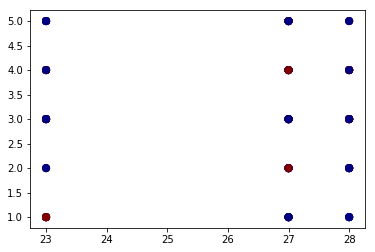

In [655]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, s = 50, cmap = 'jet')

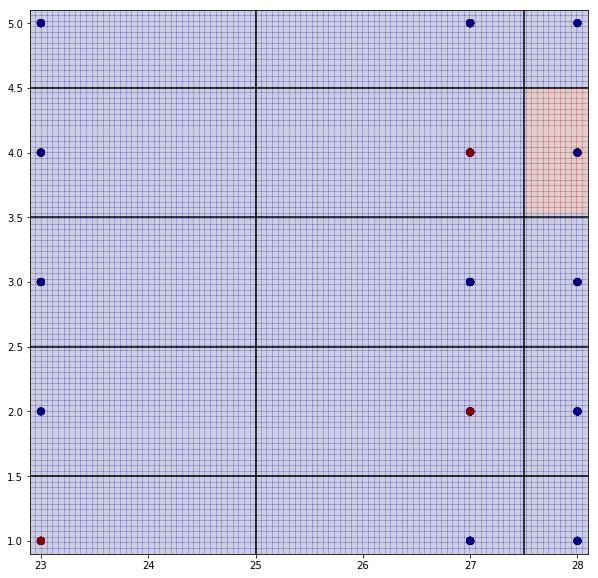

In [656]:
clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 8)
visualize_tree(clf, X_train, y_train)

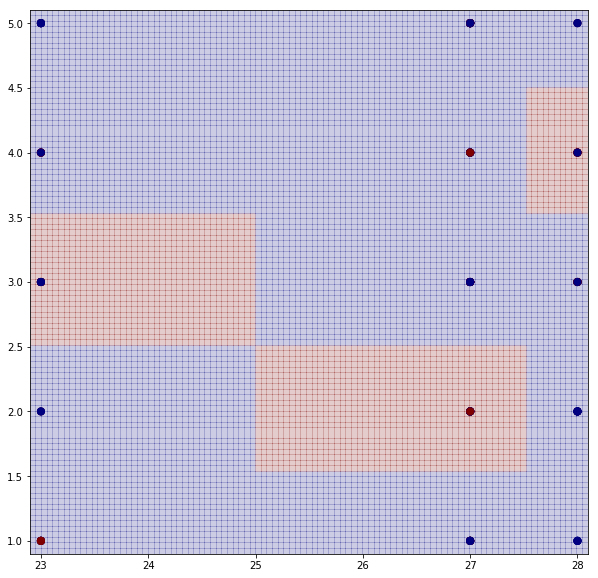

In [657]:
dtreee = RandomForestClassifier(n_estimators = 11, 
                                 criterion = "entropy",
                                 max_features = "auto",
                                 max_depth=8,
                                 min_samples_split = 2,
                                 min_samples_leaf = 1,
                                 min_weight_fraction_leaf = 0,
                                 max_leaf_nodes = None,
                                 n_jobs = 1,
                                 random_state = 8)
visualize_tree(dtreee, X_train, y_train, boundaries = False)

In [449]:
from mpl_toolkits.mplot3d import Axes3D

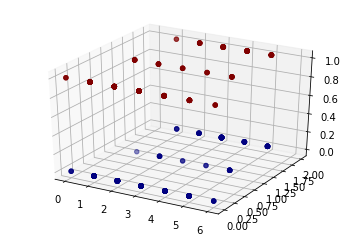

In [211]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c = y_train, s = 20, cmap = 'jet')
# Axes3D.scatter(X_train[:, 0], X_train[:, 1], y_train, c = y_train, s = 50)